In [2]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [3]:
import pandas as pd
import numpy as np
from numpy.random import seed
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib import pyplot

# Importing ALL data from file

In [4]:
import csv
file = open('beg-hyp/weather_train.csv')
csvreader = csv.reader(file)
x_data = []
y_data =[]
count = 0
for row in csvreader:
    if count == 0:
        count += 1
        header = row[3:]
        continue
    x = [float(i) for i in row[3:-1]]
    y = float(row[-1])

    if float(row[-1]) > -100:
        x_data.append(x)
        y_data.append(y)


# Importing Required data from file

In [10]:
import csv
file = open('beg-hyp/weather_train.csv')
csvreader = csv.reader(file)
x_data = []
y_data =[]
count = 0
for row in csvreader:
    if count == 0:
        count += 1
        #print(row)
        header = row[3:14]
        header.extend(row[15:])
        continue
    x = [float(i) for i in row[3:14]]
    x.extend([float(i) for i in row[15:-1]])
    y = float(row[-1])

    if float(row[-1]) > -100:
        x_data.append(x)
        y_data.append(y)



In [11]:
headerx = header[:-1]
headery = header[-1]
headerx

['Global CMP22 (vent/cor) [W/m^2]',
 'Direct sNIP [W/m^2]',
 'Azimuth Angle [degrees]',
 'Tower Dry Bulb Temp [deg C]',
 'Tower Wet Bulb Temp [deg C]',
 'Tower Dew Point Temp [deg C]',
 'Tower RH [%]',
 'Peak Wind Speed @ 6ft [m/s]',
 'Avg Wind Direction @ 6ft [deg from N]',
 'Station Pressure [mBar]',
 'Precipitation (Accumulated) [mm]',
 'Albedo (CMP11)',
 'Cloud Type',
 'Solar Zenith Angle']

In [12]:
df1 = pd.DataFrame(np.array(x_data), columns=headerx)
df2 = pd.DataFrame(np.array(y_data), columns=[headery])

In [13]:
df1.isna().sum()

Global CMP22 (vent/cor) [W/m^2]          0
Direct sNIP [W/m^2]                      0
Azimuth Angle [degrees]                  0
Tower Dry Bulb Temp [deg C]              0
Tower Wet Bulb Temp [deg C]              0
Tower Dew Point Temp [deg C]             0
Tower RH [%]                             0
Peak Wind Speed @ 6ft [m/s]              0
Avg Wind Direction @ 6ft [deg from N]    0
Station Pressure [mBar]                  0
Precipitation (Accumulated) [mm]         0
Albedo (CMP11)                           0
Cloud Type                               0
Solar Zenith Angle                       0
dtype: int64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(df1, df2, test_size=0.1)


In [15]:

x_train = preprocessing.scale(x_train)

x_test = preprocessing.scale(x_test)

In [16]:
x_train = np.array(x_train).astype("float32")

In [17]:
y_train = np.array(y_train)

In [14]:

#####Model 1

model = Sequential([
    Dense(32, input_shape=(14,), activation='relu'),
    #Dropout(0.2),
    Dense(1, activation='relu'),
    #Dropout(0.2),
    #Dense(30, activation='relu'),
    #Dropout(0.2),
    #Dense(10, activation='relu'),
    #Dense(20, activation='relu'),
    Dense(1, activation='linear')
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                480       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


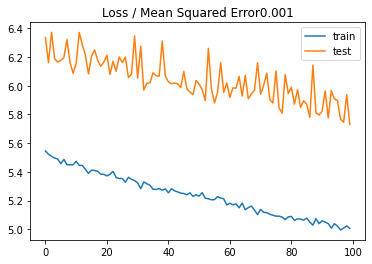

In [17]:
learnr = [0.001]
for lr in learnr: 
    model.compile(optimizer=Adam(learning_rate=lr),loss='mean_squared_error',metrics=['mae'])
    history = model.fit(
        x_train,
        y_train,
        batch_size=32,
        epochs=100,
        validation_split=0.1,
        verbose = 0
    )
    pyplot.title('Loss / Mean Squared Error' + str(lr))
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()

In [78]:
model.predict(x_test)

array([[ 0.7673025 ],
       [ 8.484436  ],
       [-1.5260992 ],
       ...,
       [-0.03498459],
       [-0.29293442],
       [-0.08282852]], dtype=float32)

In [79]:
y_test

,Snow Depth [cm]
2031,0.432
12677,3.380
4554,-0.460
2473,1.056
1113,0.046
...,...
5931,0.438
2402,0.059
8987,-0.129
14052,-0.214


14986

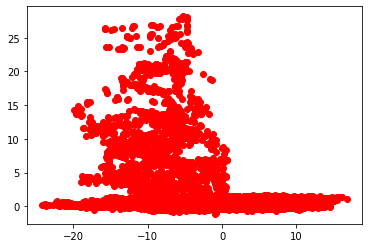

In [624]:

x_axis = [i[5] for i in x_data]
pyplot.plot(x_axis,y_data,'ro')

In [96]:
min(df2.iloc[:,-1])

-7999.0

In [92]:
model1 = Sequential([
    Dense(64, input_shape=(14,), activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(1, activation='linear')
])

In [93]:
model1.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 64)                960       
_________________________________________________________________
dense_139 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_140 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_141 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_142 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_143 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_144 (Dense)            (None, 64)              

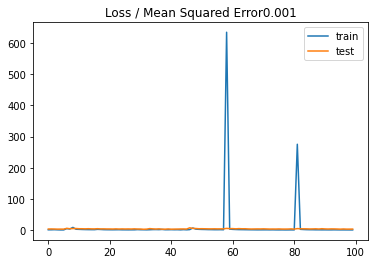

In [97]:
lr = [0.001]
for lr in learnr: 
    model1.compile(optimizer=Adam(learning_rate=lr),loss='mean_squared_error',metrics=['mae'])
    history = model1.fit(
        x_train,
        y_train,
        batch_size=32,
        epochs=100,
        validation_split=0.1,
        verbose = 0
    )
    pyplot.title('Loss / Mean Squared Error' + str(lr))
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()

In [42]:
import csv
file = open('beg-hyp/weather_test.csv')
csvreader = csv.reader(file)
x_wtest = []
count = 0
for row in csvreader:
    if count == 0:
        count += 1
        #print(row)
        header = row[3:14]
        header.extend(row[15:])
        continue
    x = [float(i) for i in row[3:14]]
    x.extend([float(i) for i in row[15:]])
    #y = float(row[-1])


    x_wtest.append(x)
        #y_data.append(y)

In [43]:
headerx = header
headerx

['Global CMP22 (vent/cor) [W/m^2]',
 'Direct sNIP [W/m^2]',
 'Azimuth Angle [degrees]',
 'Tower Dry Bulb Temp [deg C]',
 'Tower Wet Bulb Temp [deg C]',
 'Tower Dew Point Temp [deg C]',
 'Tower RH [%]',
 'Peak Wind Speed @ 6ft [m/s]',
 'Avg Wind Direction @ 6ft [deg from N]',
 'Station Pressure [mBar]',
 'Precipitation (Accumulated) [mm]',
 'Albedo (CMP11)',
 'Cloud Type',
 'Solar Zenith Angle']

In [44]:
dftest = pd.DataFrame(np.array(x_wtest), columns=headerx)

In [49]:
len(dftest)

2406

In [48]:
dftest

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Albedo (CMP11),Cloud Type,Solar Zenith Angle
0,-0.821587,-0.197822,270.39668,0.344,-3.269,-9.469,43.43,1.95,300.70,817.643,0.000,0.0000,7.0,163.53
1,-0.464099,0.039564,83.18453,-15.420,-16.249,-19.649,67.07,1.20,308.30,809.469,0.000,0.0000,0.0,84.09
2,-1.133330,-0.009875,35.33772,22.380,11.522,3.122,28.25,1.70,214.00,813.392,0.000,0.0000,7.0,109.24
3,849.620000,946.128000,244.34737,14.240,6.585,-1.215,34.02,3.45,45.53,821.467,0.000,0.1844,7.0,156.80
4,44.193400,0.488831,230.89280,-5.580,-6.169,-7.269,86.40,1.20,15.69,812.324,0.000,0.6648,7.0,154.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,-1.444170,-0.360447,292.96778,9.820,3.214,-4.886,33.41,1.70,272.00,824.536,0.000,0.0000,7.0,52.08
2402,490.631000,996.863000,168.59312,14.500,3.446,-13.654,11.30,2.45,154.90,811.310,0.000,0.2381,3.0,75.61
2403,-0.957105,-0.143412,1.93913,6.984,2.890,-1.610,53.41,2.70,22.43,820.148,0.000,0.0000,3.0,108.22
2404,502.869000,978.244000,174.94429,4.311,-1.305,-10.505,29.84,8.70,287.10,814.018,0.000,0.6220,7.0,9.83


In [38]:
x_train = preprocessing.scale(dftest)
x_train

array([[-0.71378751, -0.66751449,  0.91881239, ..., -0.73896191,
         1.36076193,  1.80437757],
       [-0.71260561, -0.66688834, -0.99972505, ..., -0.73896191,
        -0.85889448, -0.15303458],
       [-0.71481817, -0.66701875, -1.49005591, ..., -0.73896191,
         1.36076193,  0.46666476],
       ...,
       [-0.71423555, -0.66737097, -1.8323224 , ..., -0.73896191,
         0.09238684,  0.44153182],
       [ 0.95147513,  1.91328711, -0.05937724, ...,  2.43316937,
         1.36076193, -1.98281084],
       [ 1.49594387,  0.06724351,  0.48086085, ...,  0.049991  ,
        -0.85889448, -1.17535369]])

In [39]:
x_train = np.array(x_train).astype("float32")

In [175]:
prediction = model1.predict(x_train)
dfout = pd.DataFrame(prediction, columns = ['Snow Depth[cm]'])
dfout

,Snow Depth[cm]
0,0.736650
1,12.770063
2,0.376605
3,0.699001
4,7.102108
...,...
2401,0.248182
2402,0.324089
2403,0.394126
2404,0.666364


In [176]:
ofile = open('sub.csv','w')
writer = csv.writer(ofile)
for i in range(2406):
    writer.writerow([i,dfout['Snow Depth[cm]'][i]])

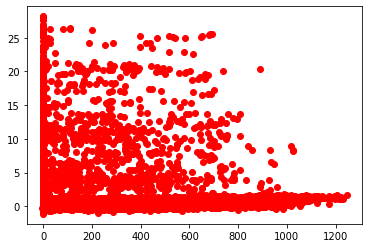

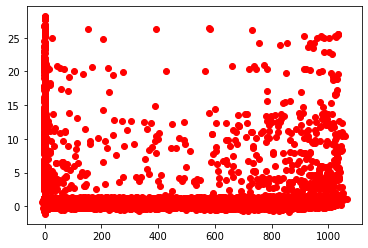

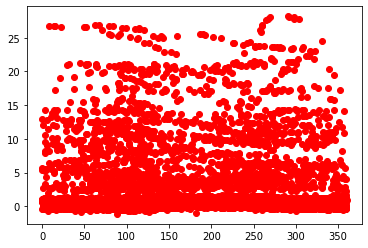

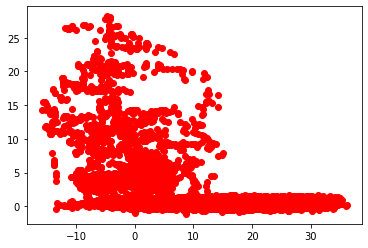

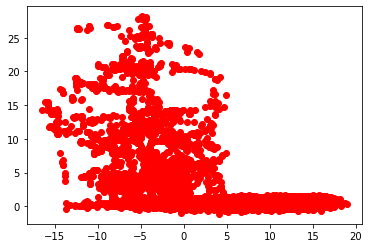

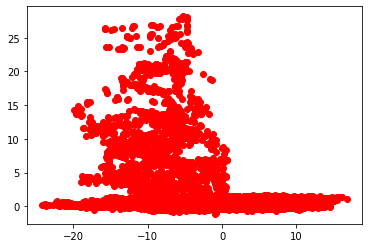

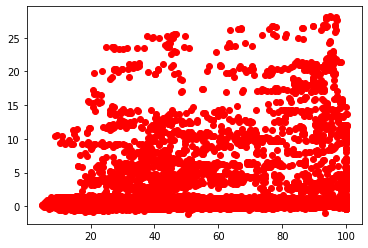

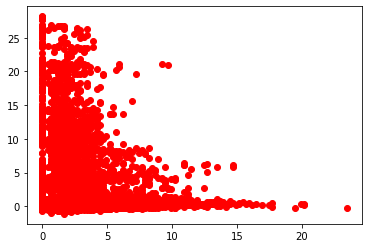

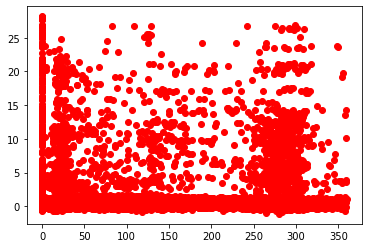

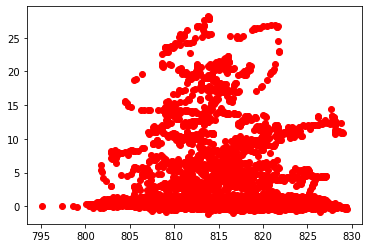

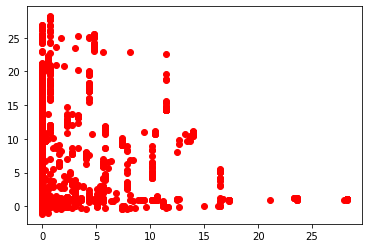

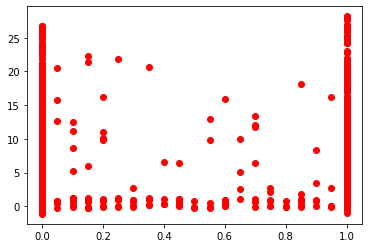

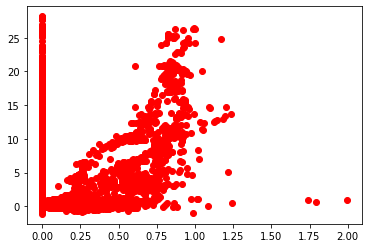

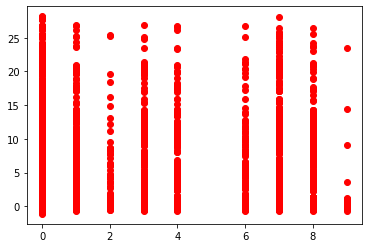

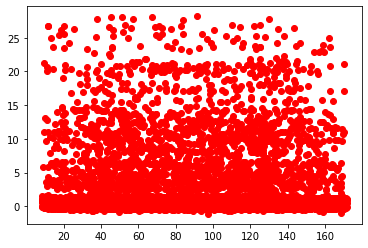

In [23]:
for j in range(df1.shape[1]):
    x_axis = [i[j] for i in x_data]
    pyplot.plot(x_axis,y_data,'ro')
    pyplot.show()

In [27]:
model2 = Sequential([
    Dense(64, input_shape=(14,), activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(64,activation='elu'),
    Dense(1, activation='linear')
])

In [28]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 64)                960       
_________________________________________________________________
dense_43 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_44 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_45 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_47 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_48 (Dense)             (None, 64)               

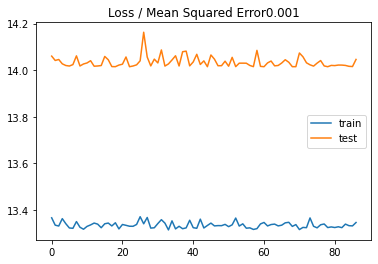

In [61]:
callback = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=50)
lr = [0.001]
for lr in learnr: 
    model2.compile(optimizer=Adam(learning_rate=lr),loss='mean_squared_error',metrics=['mae'])
    history = model2.fit(
        x_train,
        y_train,
        batch_size=32,
        epochs=400,
        validation_split=0.1,
        verbose = 0,
        callbacks = [callback]
    )
    pyplot.title('Loss / Mean Squared Error' + str(lr))
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()

In [51]:
x_train

array([[-0.7137875 , -0.6675145 ,  0.9188124 , ..., -0.73896194,
         1.3607619 ,  1.8043776 ],
       [-0.7126056 , -0.66688836, -0.99972504, ..., -0.73896194,
        -0.85889447, -0.15303458],
       [-0.7148182 , -0.6670188 , -1.4900559 , ..., -0.73896194,
         1.3607619 ,  0.46666476],
       ...,
       [-0.71423554, -0.667371  , -1.8323224 , ..., -0.73896194,
         0.09238684,  0.44153184],
       [ 0.95147514,  1.9132872 , -0.05937724, ...,  2.4331694 ,
         1.3607619 , -1.9828109 ],
       [ 1.4959439 ,  0.06724352,  0.48086086, ...,  0.049991  ,
        -0.85889447, -1.1753536 ]], dtype=float32)

In [54]:
prediction = model2.predict(x_train)
dfout = pd.DataFrame(prediction, columns = ['Snow Depth[cm]'])
dfout

,Snow Depth[cm]
0,0.589669
1,7.998647
2,0.589669
3,0.589669
4,0.589669
...,...
2401,0.589669
2402,0.589669
2403,0.589669
2404,0.589669
